In [1]:
import requests
import datetime
import time
import zipfile
import json
import os
import io
import re
from collections import Counter
from github import Github
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from github import Github
from dateutil.relativedelta import relativedelta, MO
import nltk
from requests.auth import HTTPBasicAuth
from datetime import datetime, timedelta
import csv
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse

from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import time

In [4]:
location = "github_doc_with_lot_of_information.csv"

df = pd.read_csv(location)
print(df.columns)
df.head()

Index(['repo_name', 'number_of_stars', 'descriptions', 'project_date',
       'project_size', 'project_lang', 'last_updated', '#_of_fork',
       '#_open_issue', 'project_score', '#_of_watcher', 'num_contributors',
       'num_releases', 'Total Versions', 'Total Contributors',
       'len_contributors_url', 'len_subscribers_url', 'len_git_commits_url',
       'len_comments_url', 'len_issue_comment_url', 'len_downloads_url',
       'len_issues_url', 'len_pulls_url', 'network_count',
       'subscribers_count'],
      dtype='object')


,repo_name,number_of_stars,descriptions,project_date,project_size,project_lang,last_updated,#_of_fork,#_open_issue,project_score,...,len_contributors_url,len_subscribers_url,len_git_commits_url,len_comments_url,len_issue_comment_url,len_downloads_url,len_issues_url,len_pulls_url,network_count,subscribers_count
0,cookiecutter/cookiecutter,20468,A cross-platform command-line utility that cre...,2013-07-14T18:31:22Z,3088,Python,2023-10-24T00:24:05Z,1936,223,1.0,...,67,66,72,72,79,64,70,69,1949,226
1,tiangolo/full-stack-fastapi-postgresql,13224,"Full stack, modern web application generator. ...",2019-02-23T15:08:34Z,831,Python,2023-10-23T22:32:49Z,2419,229,1.0,...,80,79,85,85,92,77,83,82,2432,199
2,cookiecutter/cookiecutter-django,10947,Cookiecutter Django is a framework for jumpsta...,2013-08-14T17:43:31Z,8218,Python,2023-10-23T21:51:11Z,2724,93,1.0,...,74,73,79,79,86,71,77,76,2729,192
3,drivendata/cookiecutter-data-science,7042,"A logical, reasonably standardized, but flexib...",2015-10-30T19:19:57Z,772,Python,2023-10-23T20:16:18Z,2241,53,1.0,...,78,77,83,83,90,75,81,80,2245,118
4,cookiecutter-flask/cookiecutter-flask,4440,"A flask template with Bootstrap, asset bundlin...",2013-08-16T07:27:55Z,3207,Python,2023-10-23T11:05:18Z,753,3,1.0,...,79,78,84,84,91,76,82,81,752,85


In [9]:
star = df.groupby("number_of_stars")["project_lang"].sum().reset_index()

In [11]:
star = df.groupby(['number_of_stars']).size().reset_index()

star

,number_of_stars,0
0,78,1
1,79,1
2,80,1
3,87,2
4,90,1
...,...,...
86,4440,1
87,7042,1
88,10947,1
89,13224,1


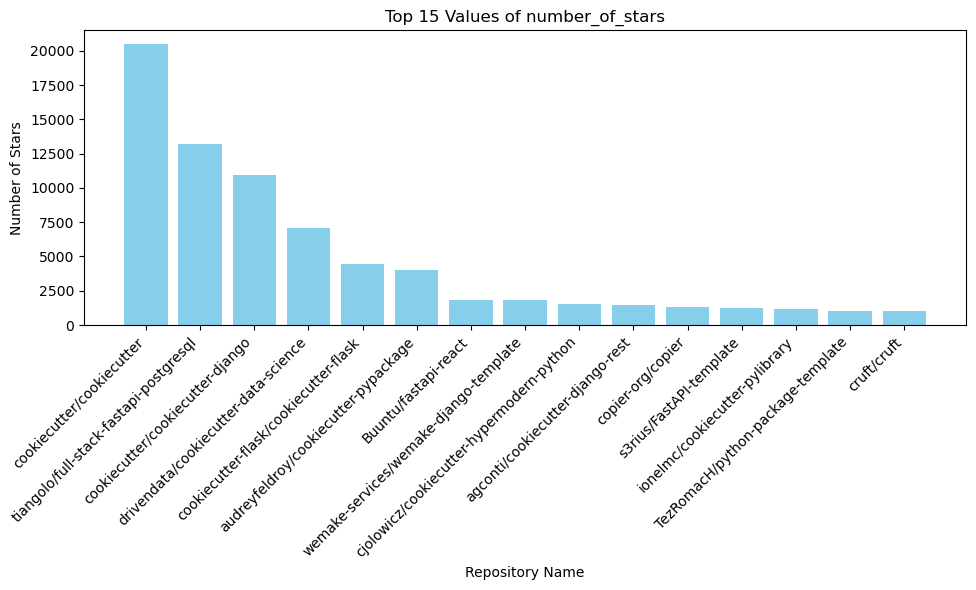

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace df['number_of_stars'] and df['repo_name'] with the actual column names in your DataFrame
top_15_values = df.nlargest(15, 'number_of_stars')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_15_values['repo_name'], top_15_values['number_of_stars'], color='skyblue')
plt.title('Top 15 Values of number_of_stars')
plt.xlabel('Repository Name')
plt.ylabel('Number of Stars')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

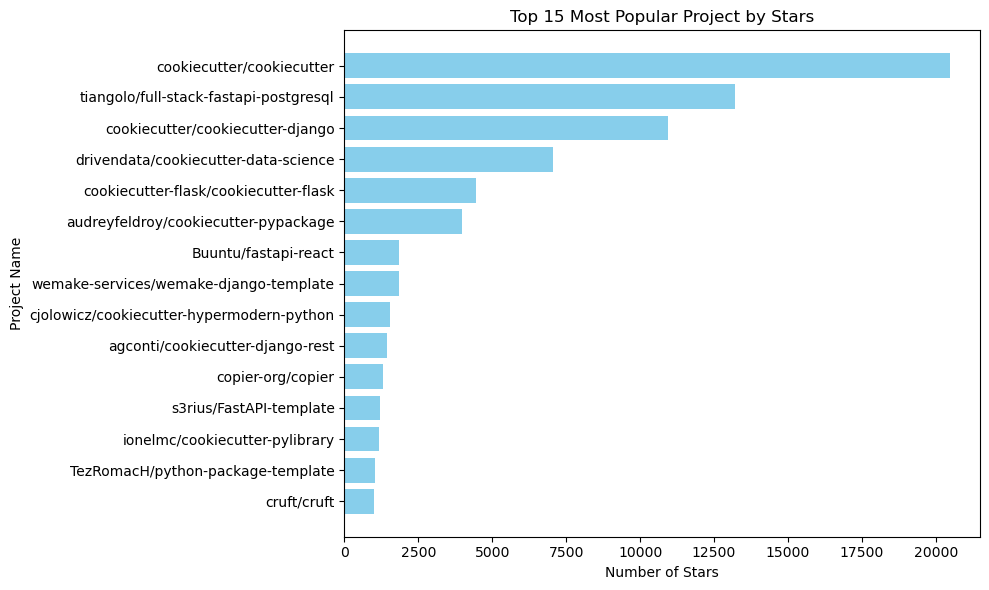

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace df['number_of_stars'] and df['repo_name'] with the actual column names in your DataFrame
top_15_values = df.nlargest(15, 'number_of_stars')

# Sort the DataFrame in descending order based on 'number_of_stars'
top_15_values = top_15_values.sort_values(by='number_of_stars', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_15_values['repo_name'], top_15_values['number_of_stars'], color='skyblue')
plt.title('Top 15 Most Popular Project by Stars')
plt.xlabel('Number of Stars')
plt.ylabel('Project Name')
plt.tight_layout()
plt.show()


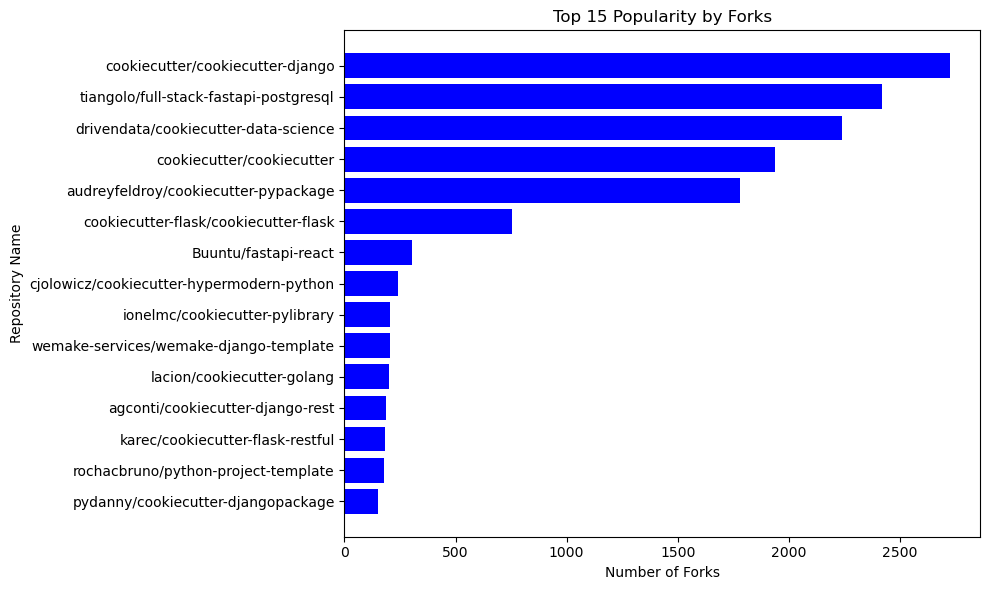

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace df['number_of_stars'] and df['repo_name'] with the actual column names in your DataFrame
top_15_values = df.nlargest(15, '#_of_fork')

# Sort the DataFrame in descending order based on 'number_of_stars'
top_15_values = top_15_values.sort_values(by='#_of_fork', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_15_values['repo_name'], top_15_values['#_of_fork'], color='blue')
plt.title('Top 15 Popularity by Forks')
plt.xlabel('Number of Forks')
plt.ylabel('Repository Name')
plt.tight_layout()
plt.show()


In [24]:
grouped_df = df.groupby('project_lang')["#_of_fork"].sum().reset_index()

grouped_df

,project_lang,#_of_fork
0,CSS,91
1,Dockerfile,18
2,Go,229
3,Java,47
4,JavaScript,152
5,Jupyter Notebook,68
6,Kotlin,90
7,Makefile,266
8,Python,16569
9,Ruby,52


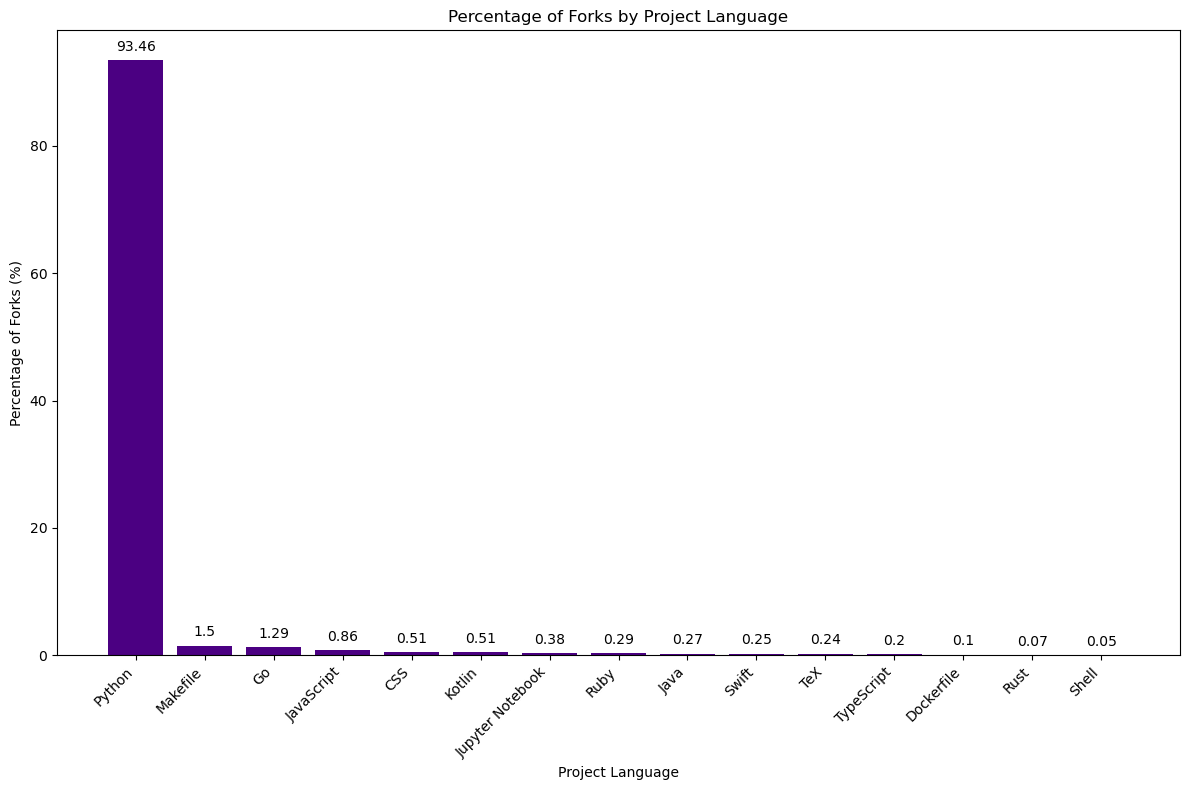

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace df['project_lang'] and df['#_of_fork'] with the actual column names in your DataFrame

# Group by 'project_lang' and sum the '#_of_fork' values
grouped_df = df.groupby('project_lang')['#_of_fork'].sum().reset_index()

# Calculate the percentage of forks for each project language
grouped_df['fork_percentage'] = (grouped_df['#_of_fork'] / grouped_df['#_of_fork'].sum()) * 100

# Sort the DataFrame in descending order based on fork_percentage
grouped_df = grouped_df.sort_values(by='fork_percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(grouped_df['project_lang'], grouped_df['fork_percentage'], color='indigo')
plt.title('Percentage of Forks by Project Language')
plt.xlabel('Project Language')
plt.ylabel('Percentage of Forks (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display percentage values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

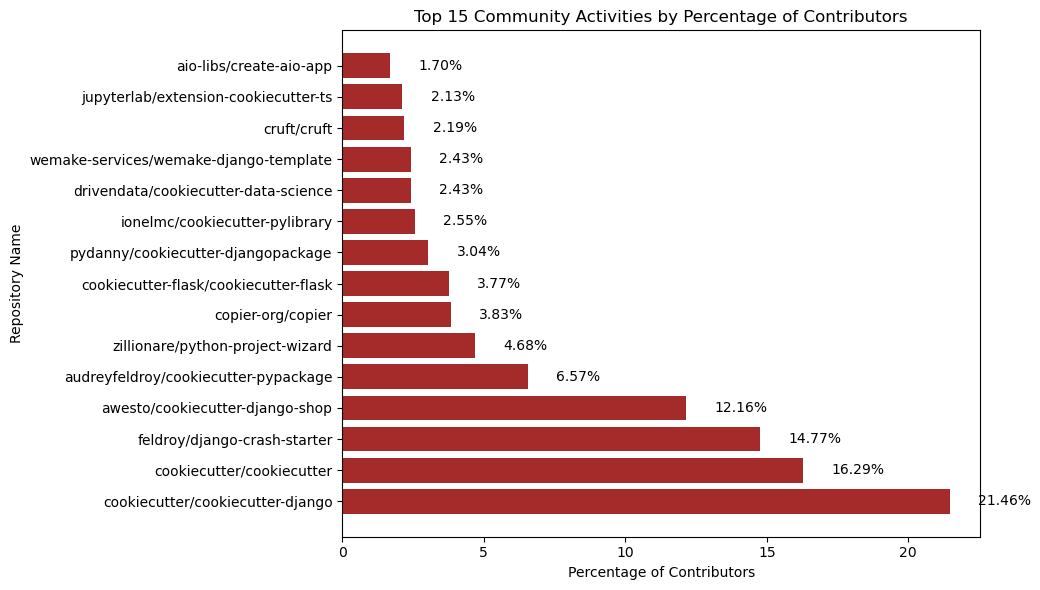

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace df['Total Contributors'] and df['repo_name'] with the actual column names in your DataFrame
top_15_values = df.nlargest(15, 'Total Contributors')

# Sort the DataFrame in descending order based on 'Total Contributors'
top_15_values = top_15_values.sort_values(by='Total Contributors', ascending=False)

# Calculate the percentage of 'Total Contributors' relative to the sum
total_contributors_sum = top_15_values['Total Contributors'].sum()
top_15_values['Percentage'] = (top_15_values['Total Contributors'] / total_contributors_sum) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_15_values['repo_name'], top_15_values['Percentage'], color='brown')
plt.title('Top 15 Community Activities by Percentage of Contributors')
plt.xlabel('Percentage of Contributors')
plt.ylabel('Repository Name')
plt.tight_layout()

# Display percentage values next to each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, f'{xval:.2f}%', ha='left', va='center')

plt.show()


In [31]:
dat = "combined_issues.csv"
df1 = pd.read_csv(dat, encoding="utf-8")
df1

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21T12:05:12Z,Open,update,2023-11-21T19:21:46.359143
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20T12:05:11Z,Closed,update,2023-11-21T12:05:18Z
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19T12:05:28Z,Closed,update,2023-11-20T12:05:17Z
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18T12:05:10Z,Closed,update,2023-11-19T12:05:32Z
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17T12:05:11Z,Closed,update,2023-11-18T12:05:15Z
...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14T18:33:49Z,Closed,NaN,2022-02-15T00:34:02Z
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07T20:47:13Z,Closed,NaN,2021-08-07T20:50:51Z
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15T09:48:46Z,Closed,NaN,2021-06-15T11:03:13Z
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,NaN,2021-05-08T06:48:48Z,Closed,NaN,2021-06-01T18:36:33Z


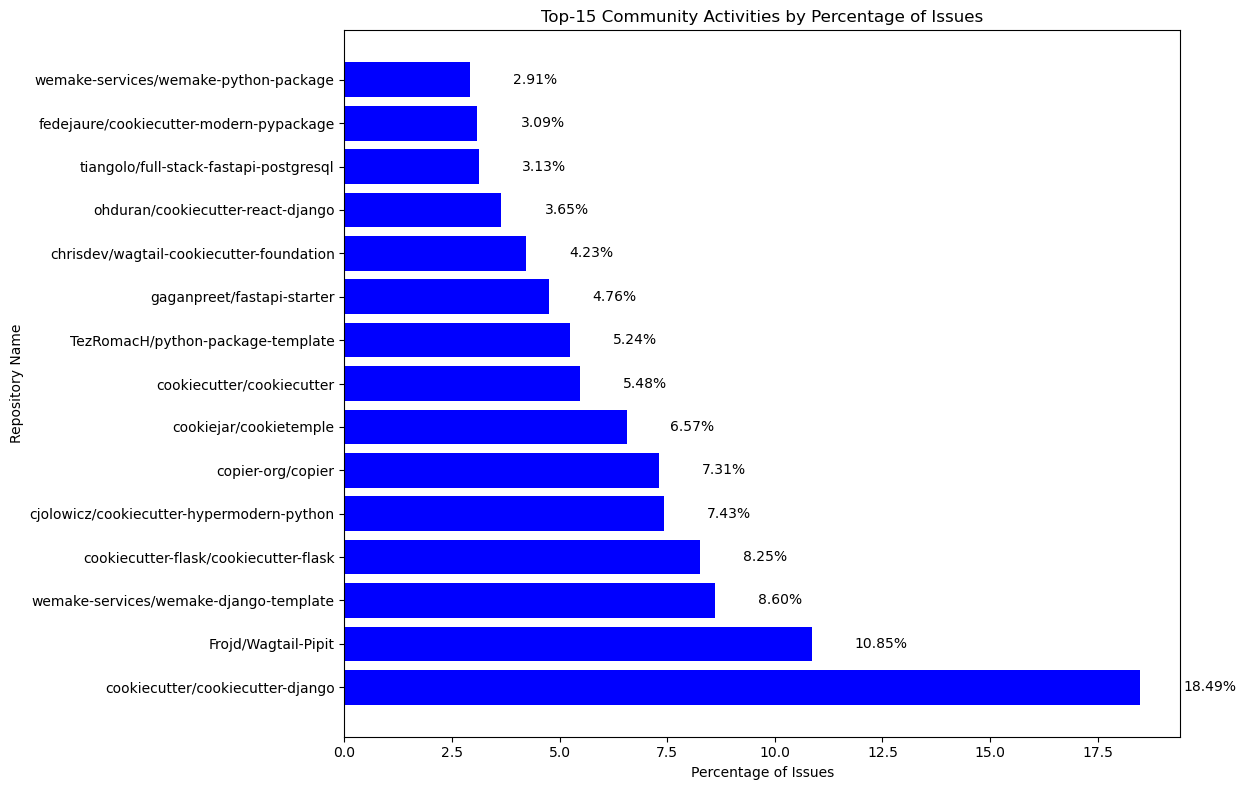

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
# Replace df1['repo_name'] and df1['issue_title'] with the actual column names in your DataFrame

# Group by 'repo_name' and count the number of unique 'issue_title'
grouped_df1 = df1.groupby('repo_name')['issue_title'].nunique().reset_index()

# Sort the DataFrame in descending order based on 'issue_title'
grouped_df1 = grouped_df1.sort_values(by='issue_title', ascending=False).head(15)

# Calculate the percentage of issues relative to the sum
total_issues = grouped_df1['issue_title'].sum()
grouped_df1['Percentage'] = (grouped_df1['issue_title'] / total_issues) * 100

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(grouped_df1['repo_name'], grouped_df1['Percentage'], color='blue')  # Use barh for horizontal bar plot
plt.title('Top-15 Community Activities by Percentage of Issues')
plt.xlabel('Percentage of Issues')
plt.ylabel('Repository Name')
plt.tight_layout()

# Display percentage values next to each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, f'{xval:.2f}%', ha='left', va='center')

plt.show()


In [58]:
grouped_df1 = df1.groupby('repo_name')['issue_title'].nunique().reset_index()
grouped_df1.to_csv("number_of_issues.csv", index = None)

In [88]:
loc = "nnnnnnnnnnnnnfiles.csv"
df2 = pd.read_csv(loc)
df2["closed_issues"] = df2["total_issues"]-df2["#_open_issue"]
df2.columns

Index(['repo_name', 'total_issues', 'number_of_stars', 'descriptions',
       'project_date', 'project_size', 'project_lang', 'last_updated',
       '#_of_fork', '#_open_issue', 'project_score', '#_of_watcher',
       'num_contributors', 'num_releases', 'Total Versions',
       'Total Contributors', 'len_contributors_url', 'len_subscribers_url',
       'len_git_commits_url', 'len_comments_url', 'len_issue_comment_url',
       'len_downloads_url', 'N_issues', 'closed_issues'],
      dtype='object')

In [89]:
k1 = df2[["repo_name", "total_issues", "number_of_stars"]]
k2 = df2[["repo_name", "closed_issues", "Total Contributors"]]

correl2

,repo_name,closed_issues,Total Contributors
0,agconti/cookiecutter-django-rest,115,19
1,aio-libs/aiohttp-devtools,372,23
2,aio-libs/create-aio-app,86,28
3,artemnovichkov/swift-project-template,11,5
4,arthurhenrique/cookiecutter-fastapi,122,4
...,...,...,...
85,wemake-services/wemake-django-template,1367,40
86,wemake-services/wemake-python-package,465,14
87,wildfish/wildfish-django-starter,5,7
88,woltapp/wolt-python-package-cookiecutter,28,5


In [87]:
df2

,repo_name,total_issues,number_of_stars,descriptions,project_date,project_size,project_lang,last_updated,#_of_fork,#_open_issue,...,Total Versions,Total Contributors,len_contributors_url,len_subscribers_url,len_git_commits_url,len_comments_url,len_issue_comment_url,len_downloads_url,N_issues,closed_issues
0,agconti/cookiecutter-django-rest,121,1441,Build best practiced apis fast with Python3,2015-06-04T16:46:49Z,5041,Python,2023-10-23T11:10:01Z,188,6,...,8,19,74,73,79,79,86,71,121,115
1,aio-libs/aiohttp-devtools,377,246,dev tools for aiohttp,2016-09-22T12:03:09Z,669,Python,2023-10-21T04:12:06Z,45,5,...,36,23,67,66,72,72,79,64,377,372
2,aio-libs/create-aio-app,126,289,The boilerplate for aiohttp. Quick setup for y...,2018-09-21T14:56:57Z,1368,Python,2023-10-16T17:40:23Z,84,40,...,9,28,65,64,70,70,77,62,126,86
3,artemnovichkov/swift-project-template,12,87,🍪 Easily generate Swift projects with Cookiecu...,2017-02-10T05:22:42Z,603,Swift,2023-05-31T10:43:28Z,17,1,...,0,5,79,78,84,84,91,76,12,11
4,arthurhenrique/cookiecutter-fastapi,129,341,Cookiecutter template for FastAPI projects usi...,2020-01-12T21:51:22Z,512,Python,2023-10-22T17:19:55Z,51,7,...,5,4,77,76,82,82,89,74,129,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,wemake-services/wemake-django-template,1405,1830,Bleeding edge django template focused on code ...,2017-09-14T09:23:23Z,5492,Python,2023-10-23T18:02:08Z,207,38,...,3,40,80,79,85,85,92,77,1405,1367
86,wemake-services/wemake-python-package,476,393,Bleeding edge cookiecutter template to create ...,2018-10-16T06:57:06Z,1231,Python,2023-10-15T09:01:28Z,47,11,...,0,14,79,78,84,84,91,76,476,465
87,wildfish/wildfish-django-starter,8,105,Django cookiecutter starter project template.,2013-03-04T14:20:43Z,191,Python,2023-06-10T22:18:40Z,15,3,...,0,7,74,73,79,79,86,71,8,5
88,woltapp/wolt-python-package-cookiecutter,41,221,Cookiecutter for rapidly creating modern & hig...,2021-06-18T08:25:27Z,2030,Python,2023-10-22T19:16:06Z,41,13,...,0,5,82,81,87,87,94,79,41,28


In [96]:
k1 = df2[["repo_name", "total_issues", "number_of_stars"]]

# Sort by "number_of_stars" in descending order
k1_sorted = k1.sort_values(by="number_of_stars", ascending=False)

# Return the top 20 rows
top_20_stars = k1_sorted#.head(20)

# Display the result
top_20_stars

,repo_name,total_issues,number_of_stars
18,cookiecutter/cookiecutter,895,20468
81,tiangolo/full-stack-fastapi-postgresql,512,13224
19,cookiecutter/cookiecutter-django,3020,10947
26,drivendata/cookiecutter-data-science,171,7042
20,cookiecutter-flask/cookiecutter-flask,1348,4440
...,...,...,...
40,iknite/cookiecutter-ansible-role,1,87
3,artemnovichkov/swift-project-template,12,87
84,wdm0006/cookiecutter-pipproject,2,80
12,better-go/go-template,5,79


In [97]:
correlation = df2["total_issues"].corr(df2["number_of_stars"])

print(f"Pearson correlation between 'total_issues' and 'number_of_stars': {correlation}")

Pearson correlation between 'total_issues' and 'number_of_stars': 0.455062636800424


In [98]:
from scipy.stats import pearsonr

# Assuming df2 is your DataFrame
# Replace "total_issues" and "number_of_stars" with the actual column names if needed

correlation, p_value = pearsonr(df2["total_issues"], df2["number_of_stars"])

# Format output to four significant figures
formatted_correlation = format(correlation, '.4f')
formatted_p_value = format(p_value, '.4f')

print(f"Pearson correlation between 'total_issues' and 'number_of_stars': {formatted_correlation}")
print(f"P-value: {formatted_p_value}")

Pearson correlation between 'total_issues' and 'number_of_stars': 0.4551
P-value: 0.0000


In [ ]:
corr = 0.4551
P-value: 0.0000

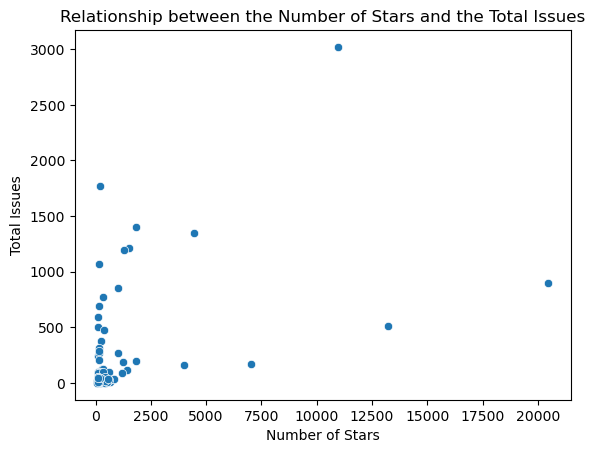

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame
# Replace "total_issues" and "number_of_stars" with the actual column names if needed

sns.scatterplot(x=df2["number_of_stars"], y=df2["total_issues"])
plt.title("Relationship between the Number of Stars and the Total Issues")
plt.xlabel("Number of Stars")
plt.ylabel("Total Issues")
plt.show()


In [103]:
from scipy.stats import pearsonr

# Assuming df2 is your DataFrame
# Replace "total_issues" and "number_of_stars" with the actual column names if needed

correlation, p_value = pearsonr(df2["closed_issues"], df2["Total Contributors"])

# Format output to four significant figures
formatted_correlation = format(correlation, '.4f')
formatted_p_value = format(p_value, '.4f')

print(f"Pearson correlation between 'closed_issues' and 'Total Contributors': {formatted_correlation}")
print(f"P-value: {formatted_p_value}")

Pearson correlation between 'closed_issues' and 'Total Contributors': 0.5028
P-value: 0.0000


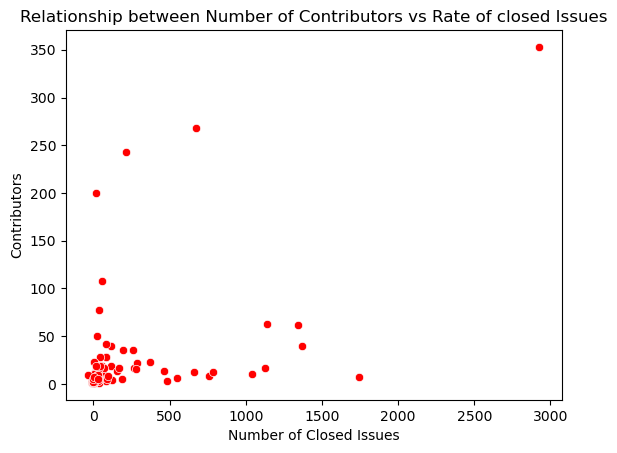

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is your DataFrame
# Replace "total_issues" and "number_of_stars" with the actual column names if needed

sns.scatterplot(x=df2["closed_issues"], y=df2["Total Contributors"], color='red')
plt.title("Relationship between Number of Contributors vs Rate of closed Issues")
plt.xlabel("Number of Closed Issues")
plt.ylabel("Contributors")
plt.show()

In [107]:
df2.columns

Index(['repo_name', 'total_issues', 'number_of_stars', 'descriptions',
       'project_date', 'project_size', 'project_lang', 'last_updated',
       '#_of_fork', '#_open_issue', 'project_score', '#_of_watcher',
       'num_contributors', 'num_releases', 'Total Versions',
       'Total Contributors', 'len_contributors_url', 'len_subscribers_url',
       'len_git_commits_url', 'len_comments_url', 'len_issue_comment_url',
       'len_downloads_url', 'N_issues', 'closed_issues'],
      dtype='object')

In [108]:
location = "github_doc_with_lot_of_information.csv"

df = pd.read_csv(location)
print(df.columns)
df.head()

Index(['repo_name', 'number_of_stars', 'descriptions', 'project_date',
       'project_size', 'project_lang', 'last_updated', '#_of_fork',
       '#_open_issue', 'project_score', '#_of_watcher', 'num_contributors',
       'num_releases', 'Total Versions', 'Total Contributors',
       'len_contributors_url', 'len_subscribers_url', 'len_git_commits_url',
       'len_comments_url', 'len_issue_comment_url', 'len_downloads_url',
       'len_issues_url', 'len_pulls_url', 'network_count',
       'subscribers_count'],
      dtype='object')


,repo_name,number_of_stars,descriptions,project_date,project_size,project_lang,last_updated,#_of_fork,#_open_issue,project_score,...,len_contributors_url,len_subscribers_url,len_git_commits_url,len_comments_url,len_issue_comment_url,len_downloads_url,len_issues_url,len_pulls_url,network_count,subscribers_count
0,cookiecutter/cookiecutter,20468,A cross-platform command-line utility that cre...,2013-07-14T18:31:22Z,3088,Python,2023-10-24T00:24:05Z,1936,223,1.0,...,67,66,72,72,79,64,70,69,1949,226
1,tiangolo/full-stack-fastapi-postgresql,13224,"Full stack, modern web application generator. ...",2019-02-23T15:08:34Z,831,Python,2023-10-23T22:32:49Z,2419,229,1.0,...,80,79,85,85,92,77,83,82,2432,199
2,cookiecutter/cookiecutter-django,10947,Cookiecutter Django is a framework for jumpsta...,2013-08-14T17:43:31Z,8218,Python,2023-10-23T21:51:11Z,2724,93,1.0,...,74,73,79,79,86,71,77,76,2729,192
3,drivendata/cookiecutter-data-science,7042,"A logical, reasonably standardized, but flexib...",2015-10-30T19:19:57Z,772,Python,2023-10-23T20:16:18Z,2241,53,1.0,...,78,77,83,83,90,75,81,80,2245,118
4,cookiecutter-flask/cookiecutter-flask,4440,"A flask template with Bootstrap, asset bundlin...",2013-08-16T07:27:55Z,3207,Python,2023-10-23T11:05:18Z,753,3,1.0,...,79,78,84,84,91,76,82,81,752,85


In [113]:
df = df.dropna(subset=['descriptions'])

df['descriptions'][0]

'A cross-platform command-line utility that creates projects from cookiecutters (project templates), e.g. Python package projects, C projects.'